# soynlp로 자연어처리 시작하기
* https://github.com/lovit/soynlp

In [0]:
# !pip install soynlp

In [0]:
!pip show soynlp

Name: soynlp
Version: 0.0.45
Summary: Unsupervised Korean Natural Language Processing Toolkits
Home-page: https://github.com/lovit/soynlp
Author: Lovit
Author-email: soy.lovit@gmail.com
License: UNKNOWN
Location: /Users/corazzon/codes/jupyter/lib/python3.6/site-packages
Requires: psutil, numpy
Required-by: 


In [0]:
import pandas as pd
import numpy as np
import re

In [0]:
df = pd.read_csv('https://s3.ap-northeast-2.amazonaws.com/data10902/petition/petition.csv', 
                 parse_dates=['start', 'end'])

## 자신의 관심사에 맞는 단어로 데이터를 가져옵니다.

In [0]:
p = r'.*(돌봄|육아|초등|보육).*'
care = df[df['title'].str.match(p) |
           df['content'].str.match(p, flags=re.MULTILINE)]
care.shape

(8382, 8)

In [0]:
care.head()

,article_id,start,end,answered,votes,category,title,content
3,24,2017-08-19,2017-08-26,0,53,일자리,공공기관 무조건적인 정규직전환을 반대합니다.,현정부에서 정규직 일자리를 늘리는 것에 찬성합니다. 그런데 공공기관 비정규직들은 인...
15,36,2017-08-19,2017-08-26,0,1,인권/성평등,한국채식인구 100만명. 학교 급식 및 군대에서 현미채식 선택권을 보장해주십시오!,문재인 대통령님과 각 정부 인사분들께 마음속 깊이 존경과 감사를 표합니다. 대한민국...
23,45,2017-08-19,2017-11-17,0,0,육아/교육,초등학교 교사 임용 시험 관련 해결방안,초등학교 교사 임용 시험을 수능 시험 처럼 전국 단위로 실시하고난 후에\n1지망 2...
27,49,2017-08-19,2017-11-17,0,27,일자리,공정한사회 절차가 바른사회가 되기를 원합니다.,문재인대통령과 교육부장관님!\n교사 정규직은 임용고시라는 제도를 통해 정교사가 될 ...
33,56,2017-08-19,2017-11-17,0,5,보건복지,장애아의 상태에 따른 장애아돌봄도우미 정책의 한계에 관하여...읽어주셨으면 하고 글...,"안녕하세요. 저는 그냥 평범한 대학생이며, 고등학생인 자폐 1급 남동생을 둔 누나입..."


In [0]:
care.tail()

,article_id,start,end,answered,votes,category,title,content
211552,273198,2018-06-17,2018-07-17,0,1,육아/교육,초등학교 저학년(1학년~) 교과서 내용을 타인의도움이 없이도 공부가 가능도록 만들어...,이제 입학을 해서 초등학교에서 ㄱㄴ을 배우는 아이들은 같은학년 특히수학이나 다른 책...
211575,273222,2018-06-17,2018-07-17,0,47,육아/교육,보육교사가 하는 일이 뭔지 알고 계신가요,안녕하세요 저는 보육교사로 일하고 있는 한 여성입니다.\n보육교사로 일하면서 힘들어...
211599,273253,2018-06-17,2018-07-17,0,8,육아/교육,자유학기제 전면 수정 요청드립니다,지금 중학교에서 시행하고있는 자유학기제에 대해서 더 나은 방안을 이야기하고자 ...
211606,273261,2018-06-17,2018-07-17,0,218,보건복지,현실에 맞는 보육료 지원 요청,어린이집을 7시 30분부터 19시 30분까지 의무 보육을 하라 하십니다~ 교사 근무...
211616,273272,2018-06-17,2018-07-17,0,2,육아/교육,자녀장려금,안녕하세요.쌍둥이 아들을 키우는 워킹맘입니다.\n맞벌이부부로 일을 하면서 자녀장려금...


In [0]:
from soynlp.tokenizer import RegexTokenizer, LTokenizer, MaxScoreTokenizer

tokenizer = RegexTokenizer()
tokenizer

In [0]:
# 샘플로 보고 싶은 인덱스의 번호를 넣어주세요.
sample_index = 211049

In [0]:
sample_title = care['title'][sample_index]
sample_title

'초중고 무상급식'

In [0]:
sample_content = care['content'][sample_index]
sample_content

'전국이  초등중등  무상급식인데\\n대구경북은  올해부터 초등만 무상이고\\n중학교는  왜    유상인지요\\n나라에서  지원해주는건데\\n대구경북만 제외시킨이유는 먼가요\\n지역상관없이 무상급식지원해야하는거 아닌가요'

# 토큰화

In [0]:
tokened_title = tokenizer.tokenize(sample_title)
tokened_title

['초중고', '무상급식']

In [0]:
tokened_content = tokenizer.tokenize(sample_content)
tokened_content[:10]

['전국이', '초등중등', '무상급식인데', '\\', 'n', '대구경북은', '올해부터', '초등만', '무상이고', '\\']

In [0]:
print(len(tokened_title))
print(len(tokened_content))

2
28


# 텍스트 데이터 전처리 
* 개행문자 제거

In [0]:
def preprocessing(text):
    # 개행문자 제거
    text = re.sub('\\\\n', ' ', text)
    return text

In [0]:
# %time을 찍어주면 해당 코드를 실행할 때 걸리는 시간을 출력해 줍니다
%time sentences = care['content'].apply(preprocessing)

CPU times: user 72.9 ms, sys: 11.8 ms, total: 84.7 ms
Wall time: 95 ms


In [0]:
%time tokens = sentences.apply(tokenizer.tokenize)
tokens[:3]

CPU times: user 17.7 s, sys: 271 ms, total: 18 s
Wall time: 18.3 s


3     [현정부에서, 정규직, 일자리를, 늘리는, 것에, 찬성합니다, ., 그런데, 공공기...
15    [문재인, 대통령님과, 각, 정부, 인사분들께, 마음속, 깊이, 존경과, 감사를, ...
23    [초등학교, 교사, 임용, 시험을, 수능, 시험, 처럼, 전국, 단위로, 실시하고난...
Name: content, dtype: object

In [0]:
tokens[sample_index][:10]

['전국이', '초등중등', '무상급식인데', '대구경북은', '올해부터', '초등만', '무상이고', '중학교는', '왜', '유상인지요']

In [0]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

def displayWordCloud(data = None, backgroundcolor = 'white', width=800, height=600 ):
    wordcloud = WordCloud(
                        font_path = '/Library/Fonts/NanumBarunGothic.ttf', 
                        stopwords = STOPWORDS, # 한국어는 해당이 없습니다. 한국어를 적용해 주려면 별도 처리가 필요합니다.
                        background_color = backgroundcolor, 
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15 , 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show() 

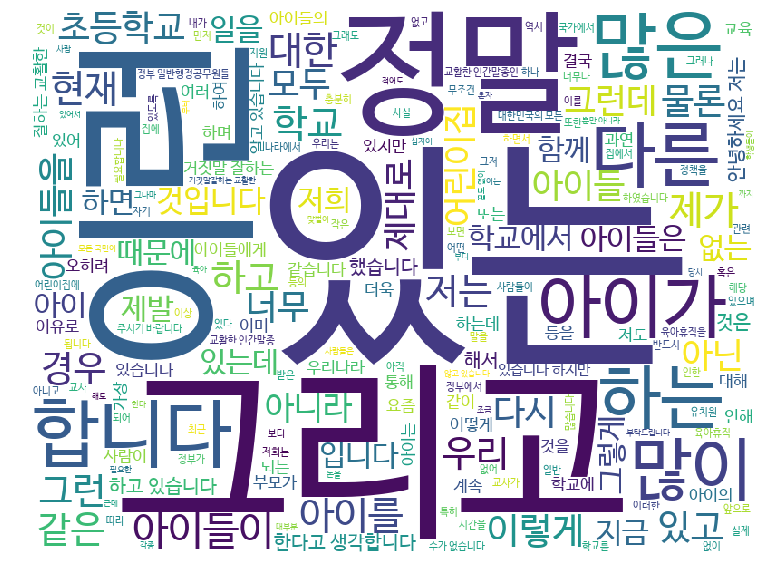

CPU times: user 19.4 s, sys: 928 ms, total: 20.3 s
Wall time: 20.8 s


In [0]:
# 결과를 출력해 보면 불용어(STOPWORD)가 너무 많습니다.
%time displayWordCloud(' '.join(sentences))

In [0]:
from soynlp.noun import LRNounExtractor

In [0]:
%%time
noun_extractor = LRNounExtractor(verbose=True)
noun_extractor.train(sentences)
nouns = noun_extractor.extract()

used default noun predictor; Sejong corpus predictor
used noun_predictor_sejong
All 2398 r features was loaded
scanning completed
(L,R) has (108055, 53386) tokens
building lr-graph completedCPU times: user 22.1 s, sys: 228 ms, total: 22.3 s
Wall time: 22.6 s


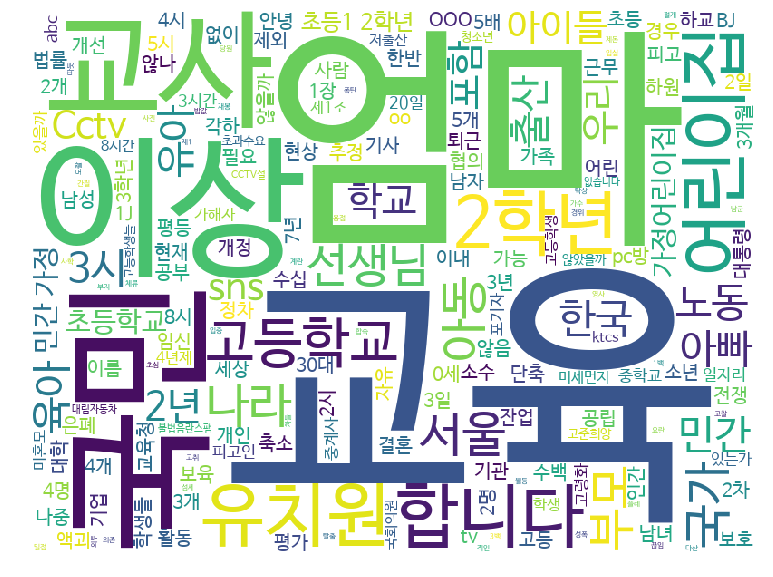

CPU times: user 1.74 s, sys: 104 ms, total: 1.84 s
Wall time: 1.85 s


In [0]:
# 추출된 명사를 찍어봅니다.
%time displayWordCloud(' '.join(nouns))